In [43]:
#Project 1 :: zomato Data Analysis using python
#----------------------------------------------
#Req Analysis 1 : Do more restaurants provide online delivery compared to offline services?
#Req Analysis 2 : Which types of restaurants are most favored by the general public?
#Req Analysis 3 : What price range do couples prefer for dining out?
#created by :: Muthu

In [44]:
#importing the DS from github repo 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/Zomato_data.csv?raw=true'
zomatodf = pd.read_csv(url)

#zomatodf = pd.read_csv(r'C:\Users\muthu\OneDrive\Documents\GitHub\DataAnalyst-Python\DataFiles\Zomato_data.csv')
zomatodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
name                           148 non-null object
online_order                   148 non-null object
book_table                     148 non-null object
rate                           148 non-null object
votes                          148 non-null int64
approx_cost(for two people)    148 non-null int64
listed_in(type)                148 non-null object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [45]:
#check if any nans value found 
is_zomato_null = zomatodf.isnull().values.any()

In [46]:
#check the sample data 
zomatodf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


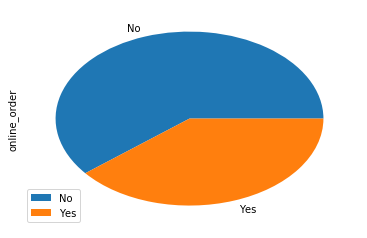

In [47]:
#Req Analysis 1 :: Do more restaurants provide online delivery compared to offline services?
#plot using the matplotlib 

zomatodf['online_order'].value_counts().plot(kind="pie",legend=True)




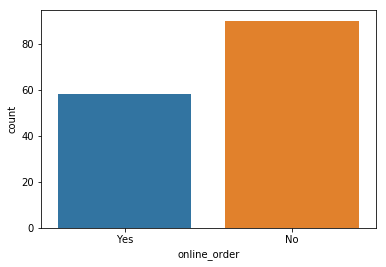

In [48]:
#plot the online order - Yes or no using seaborn

sns.countplot(x=zomatodf['online_order'])

In [49]:
#Req Analysis 2 : Which types of restaurants are most favored by the general public?

#validating the unique values to plot the graph
zomatodf['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

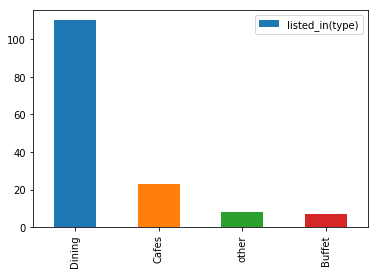

In [50]:
#plot the bar graph using matplotlib

zomatodf['listed_in(type)'].value_counts().plot(kind="bar",legend=True)

Text(0.5,0,'Type Of Restaurant')

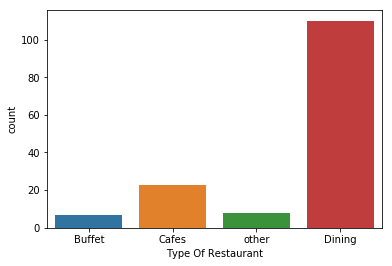

In [51]:
#plotting the same requirement using the seaborn

sns.countplot(x=zomatodf['listed_in(type)'])
plt.xlabel('Type Of Restaurant')

Text(0.5,0,'Appoximate Cost for 2 people')

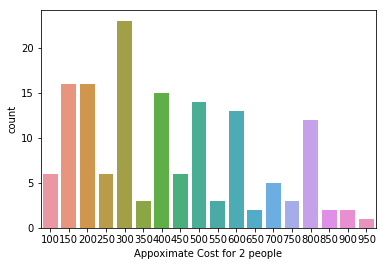

In [52]:
#Req Analysis 3 : What price range do couples prefer for dining out?

sns.countplot(x=zomatodf['approx_cost(for two people)'])
plt.xlabel('Appoximate Cost for 2 people')


Text(0,0.5,'Number of Votes')

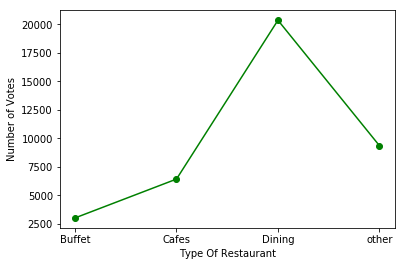

In [53]:
#Req Analysis 4: Find the Number of Votes obtained for each Restaurant Type

grouped_data = zomatodf.groupby('listed_in(type)')['votes'].sum()

#convert the grouped data (series) to DataFrame 
result = pd.DataFrame({'votes':grouped_data})
result

plt.plot(result, c='green' , marker='o')
plt.xlabel('Type Of Restaurant')
plt.ylabel('Number of Votes')

In [54]:
#Req Analysis 5 : Find the most voted restaurant: 
#Find max votes
max_votes = zomatodf['votes'].max()
#Fetch the name of restaurant for the row matching the vote
res_name = zomatodf.loc[zomatodf['votes'] == max_votes,'name']

print('Restaurant with Max No of Votes is:',res_name)

Restaurant with Max No of Votes is: 38    Empire Restaurant
Name: name, dtype: object


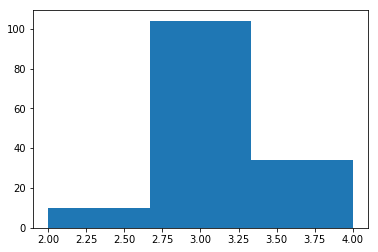

In [55]:
#Req Analysis 6 : Analyze ratings of the restaurant 

#function to cleanup the data of the rate column from 4.1/5 to 4.1
def checkrate(value) :
    value = str(value).strip('/')
    value = value[0];

    return float(value)

#copy the dataframe instead of updating the original dataframe
zomatorate = zomatodf.copy()
zomatorate['rate'] = zomatorate['rate'].apply(checkrate)

plt.hist(zomatorate['rate'],bins=3)
plt.show()


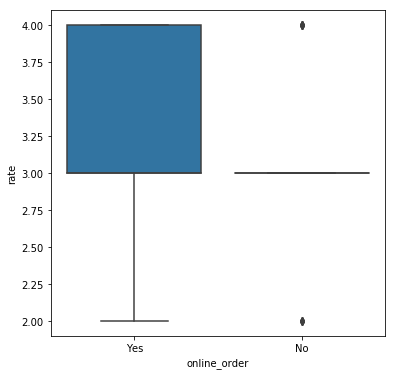

In [56]:
#Req Analysis 7 : Compare Ratings of online vs offline order 
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=zomatorate)

Pivot Table for Order Mode Preference:
online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


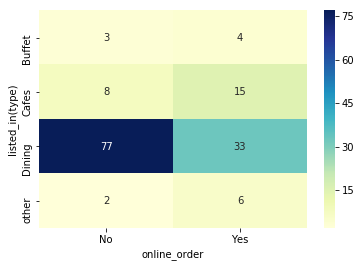

In [58]:
#Req Analysis 8 : comare the order mode preference based on the type of restaurant

zomatodf_pivot = zomatodf.pivot_table(index='listed_in(type)', columns='online_order', values='rate', aggfunc='size')
print('Pivot Table for Order Mode Preference:')
print(zomatodf_pivot)
sns.heatmap(zomatodf_pivot, annot=True, fmt='d', cmap='YlGnBu')

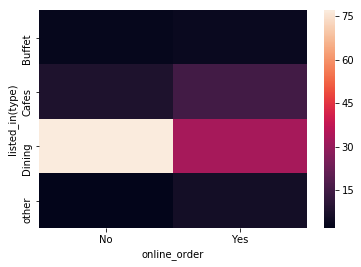

In [59]:
sns.heatmap(zomatodf_pivot)